### **Task 1: Load and Explore the Data**
The first step in any analysis is to load the dataset and get a basic understanding of its structure.

In [9]:
import pandas as pd

# Load the data
df = pd.read_csv('win_back.csv')

# Check the first few rows of the data
df.head()

,customer_id,unsub_date,re_engagement_date,user_tenure,num_logins_last_30_days,num_transactions_last_30_days,customer_segment,campaign_type,discount_offered,prev_winback_success,app_usage_time,winback_propensity_score,winback_success
0,67d96571-b3d0-4546-81f4-b0397c5abed2,2023-05-07,2023-08-12,171,7,1,Low-Value,SMS,10.51,0,353,0.503,0
1,fb955682-96af-4fde-b29a-872aec73814b,2023-03-29,2023-05-11,1098,9,2,Medium-Value,Push Notification,17.64,0,172,0.164,0
2,35f315bb-252d-40e8-ba08-25527ceb0f54,2023-08-24,2023-10-10,480,16,6,High-Value,Push Notification,22.59,0,367,0.180,0
3,28083de5-fd0e-405b-8581-d1e433e25311,2023-12-12,2023-10-18,333,9,3,Medium-Value,SMS,13.63,0,304,0.745,0
4,04e6f637-b382-499f-b223-d3f9a90e3abf,2023-06-27,2023-04-25,61,20,2,Medium-Value,SMS,26.83,0,250,0.914,1


In [11]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    10000 non-null  object 
 1   unsub_date                     10000 non-null  object 
 2   re_engagement_date             8978 non-null   object 
 3   user_tenure                    10000 non-null  int64  
 4   num_logins_last_30_days        10000 non-null  int64  
 5   num_transactions_last_30_days  10000 non-null  int64  
 6   customer_segment               10000 non-null  object 
 7   campaign_type                  10000 non-null  object 
 8   discount_offered               9519 non-null   float64
 9   prev_winback_success           10000 non-null  int64  
 10  app_usage_time                 10000 non-null  int64  
 11  winback_propensity_score       10000 non-null  float64
 12  winback_success                10000 non-null  

### **Task 2: Summary Statistics**
Generate summary statistics to understand the distribution of numerical features in the dataset.

In [14]:
# Generate summary statistics
df.describe()

,user_tenure,num_logins_last_30_days,num_transactions_last_30_days,discount_offered,prev_winback_success,app_usage_time,winback_propensity_score,winback_success
count,10000.000000,10000.000000,10000.000000,9519.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,356.289100,14.569400,2.991400,17.488039,0.095900,300.836000,0.495337,0.222300
std,355.655063,4.978701,1.718669,7.289595,0.294469,99.579296,0.287849,0.415812
min,0.000000,1.000000,0.000000,5.000000,0.000000,50.000000,0.000000,0.000000
25%,103.000000,11.000000,2.000000,11.090000,0.000000,234.000000,0.244000,0.000000
50%,247.000000,15.000000,3.000000,17.550000,0.000000,300.000000,0.495000,0.000000
75%,491.250000,18.000000,4.000000,23.880000,0.000000,367.000000,0.741000,0.000000
max,2982.000000,30.000000,13.000000,30.000000,1.000000,600.000000,1.000000,1.000000


### **Task 3: Missing Values Check**
Identify and quantify missing values in the dataset to understand the data's completeness.

In [16]:
# Check for missing values
df.isnull().sum()

customer_id                         0
unsub_date                          0
re_engagement_date               1022
user_tenure                         0
num_logins_last_30_days             0
num_transactions_last_30_days       0
customer_segment                    0
campaign_type                       0
discount_offered                  481
prev_winback_success                0
app_usage_time                      0
winback_propensity_score            0
winback_success                     0
dtype: int64

### **Task 4: Distribution of the Target Variable**
Analyze the distribution of the target variable (`winback_success`) to understand the class balance.

In [18]:
# Distribution of the target variable
df['winback_success'].value_counts(normalize=True)

0    0.7777
1    0.2223
Name: winback_success, dtype: float64

### **Task 5: Visualize Numerical Features**
Visualize the distribution of important numerical features to better understand their spread and skewness.

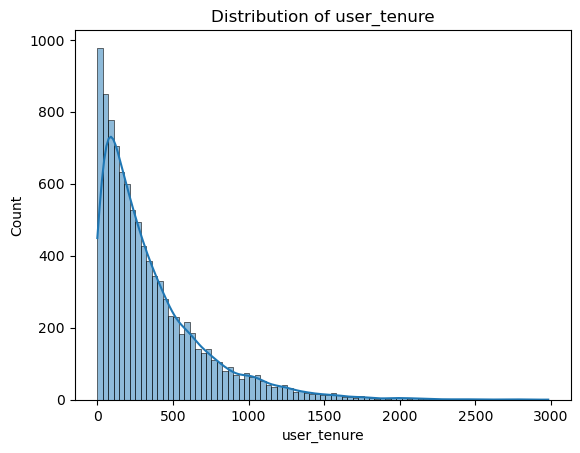

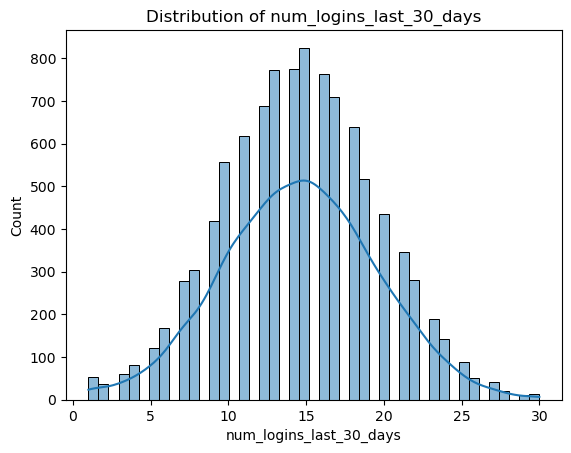

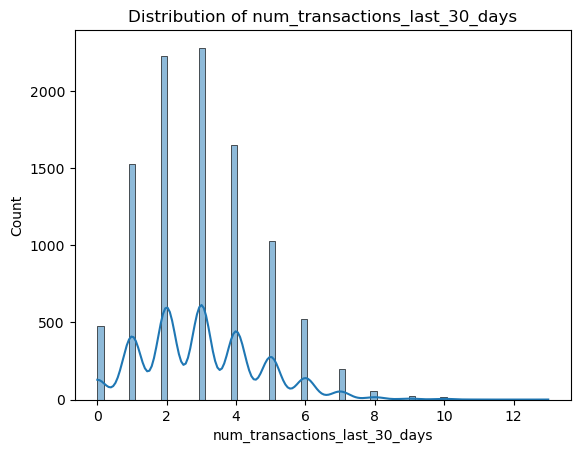

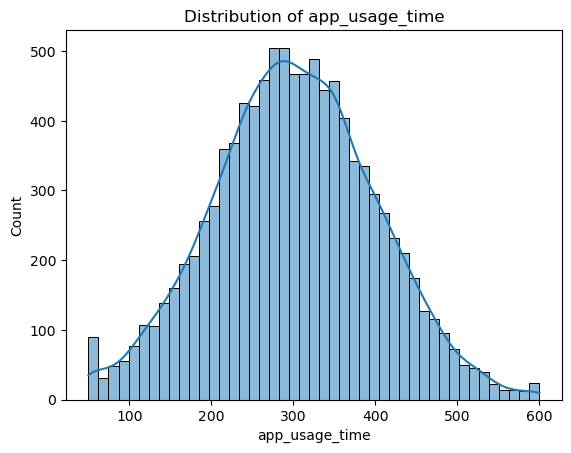

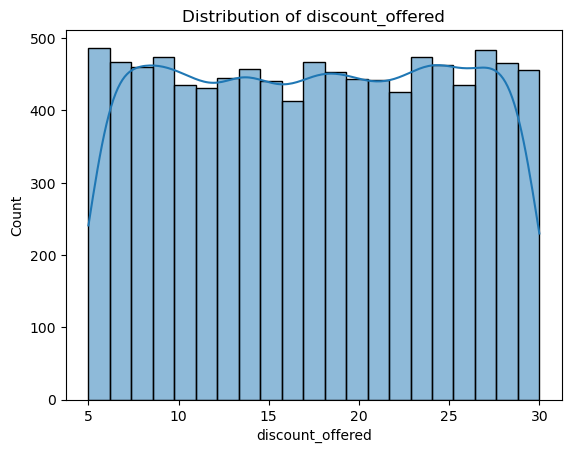

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize numerical features
num_cols = ['user_tenure', 'num_logins_last_30_days', 'num_transactions_last_30_days', 'app_usage_time', 'discount_offered']

for col in num_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### **Task 6: Categorical Features Analysis**
Examine the distribution of categorical features to get insights into the variety of values present in each.

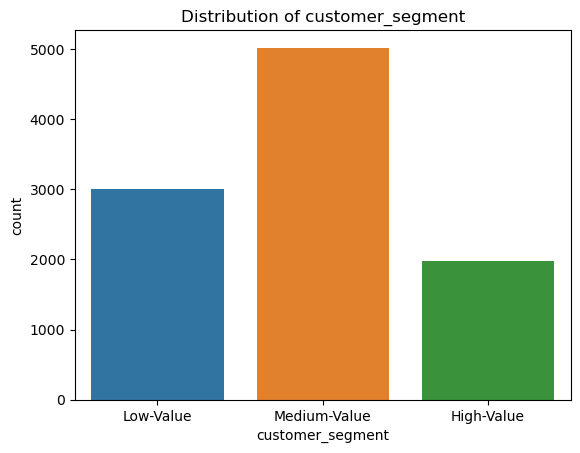

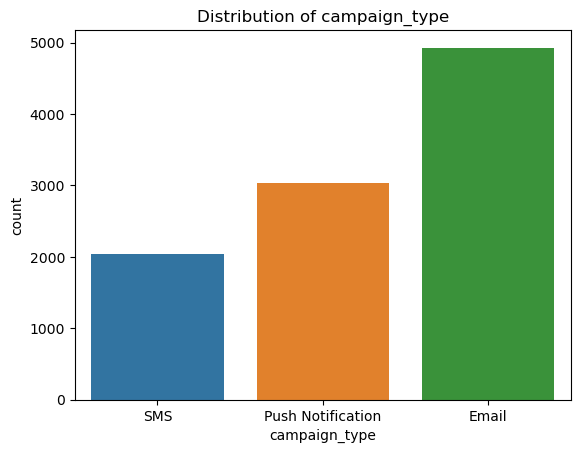

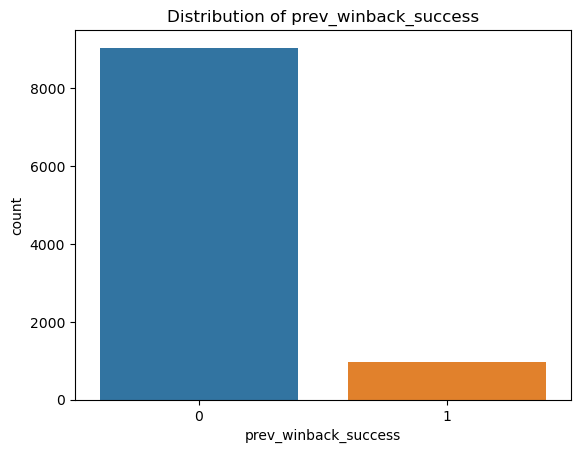

In [22]:
# Analyze categorical features
cat_cols = ['customer_segment', 'campaign_type', 'prev_winback_success']

for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

### **Task 7: Correlation Analysis**
Understand relationships between numerical features by computing a correlation matrix.

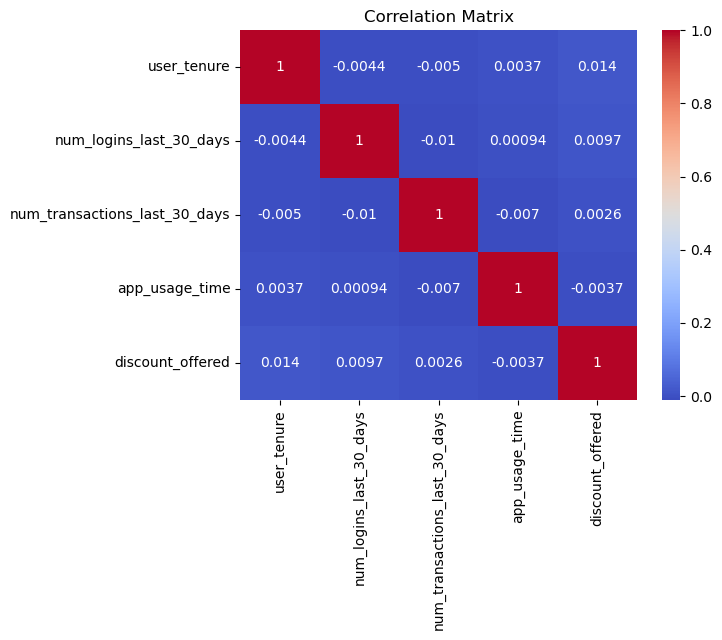

In [24]:
# Correlation matrix
corr_matrix = df[num_cols].corr()

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### **Task 8: Handle Missing Data**
Handle missing data by imputing or dropping missing values to ensure a clean dataset for model building.

In [26]:
# Fill missing values in discount_offered with the median
df['discount_offered'].fillna(df['discount_offered'].median(), inplace=True)

# Drop rows with missing 're_engagement_date'
df.dropna(subset=['re_engagement_date'], inplace=True)

### **Task 9: Feature Engineering**
Create new features such as the time between unsubscription and re-engagement to add more predictive power.

In [63]:
# Create a new feature: days between unsub and re-engagement
df['days_until_re_engagement'] = (pd.to_datetime(df['re_engagement_date']) - pd.to_datetime(df['unsub_date'])).dt.days

### **Task 10: Train-Test Split**
Split the dataset into training and testing sets for model building and evaluation.

In [66]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['user_tenure', 'num_logins_last_30_days', 'num_transactions_last_30_days', 'app_usage_time', 'discount_offered', 'prev_winback_success', 'days_until_re_engagement']]
y = df['winback_success']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Task 11: Build a Classification Model**
Build a logistic regression model to predict win-back success.

In [42]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression(class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

### **Task 12: Model Evaluation**
Evaluate the performance of the model using accuracy, precision, recall, and F1-score.

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.5217149220489977
Precision: 0.22182254196642687
Recall: 0.46835443037974683
F1 Score: 0.3010577705451587


### **Task 13: Feature Importance**
Examine the importance of each feature in predicting the target variable.

In [46]:
# Get feature importance
importance = model.coef_[0]
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v}')

Feature: user_tenure, Score: 1.5922209712692684e-05
Feature: num_logins_last_30_days, Score: -0.01242059803503787
Feature: num_transactions_last_30_days, Score: 0.03438064712668213
Feature: app_usage_time, Score: 4.691667871882108e-05
Feature: discount_offered, Score: 0.002858640950148887
Feature: prev_winback_success, Score: -0.00015484513100654817
Feature: days_until_re_engagement, Score: 0.00032662467541658336


### **Task 14: Predict on New Data**
Use the trained model to predict win-back success on new data.

In [48]:
# Predict win-back propensity on new data
new_data = X_test.iloc[0:5]  # Taking a sample of 5 new records
predictions = model.predict(new_data)
predictions

array([1, 1, 1, 0, 1], dtype=int64)

### **Task 15: Calculate the Win-Back Ratio**
Calculate the win-back ratio and assess the model’s impact on improving the success rate.

In [77]:
# Calculate win-back success rate before the model (random targeting)
baseline_success_rate = df['winback_success'].mean()

# Calculate predicted win-back success rate after the model
predicted_success_rate = y_pred.mean()

# Improvement in win-back success rate
improvement = (predicted_success_rate - baseline_success_rate) / baseline_success_rate * 100

print(f'Baseline Success Rate: {baseline_success_rate:.2%}')
print(f'Predicted Success Rate: {predicted_success_rate:.2%}')
print(f'Improvement in Success Rate: {(predicted_success_rate-baseline_success_rate)*100:.2f}%')

Baseline Success Rate: 22.40%
Predicted Success Rate: 46.44%
Improvement in Success Rate: 24.04%
